# AutoGluon Time Series - Forecasting Quick Start

https://auto.gluon.ai/stable/tutorials/timeseries/forecasting-quick-start.html

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_hourly_subset/train.csv")
df

,item_id,timestamp,target
0,H1,1750-01-01 00:00:00,605.0
1,H1,1750-01-01 01:00:00,586.0
2,H1,1750-01-01 02:00:00,586.0
3,H1,1750-01-01 03:00:00,559.0
4,H1,1750-01-01 04:00:00,511.0
...,...,...,...
148055,H200,1750-02-09 19:00:00,24.2
148056,H200,1750-02-09 20:00:00,22.6
148057,H200,1750-02-09 21:00:00,20.8
148058,H200,1750-02-09 22:00:00,19.6


In [ ]:
from autogluon.timeseries import TimeSeriesDataFrame

In [ ]:
train_data = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="item_id",
    timestamp_column="timestamp"
)
train_data

target
item_id timestamp                  
H1      1750-01-01 00:00:00   605.0
        1750-01-01 01:00:00   586.0
        1750-01-01 02:00:00   586.0
        1750-01-01 03:00:00   559.0
        1750-01-01 04:00:00   511.0
...                             ...
H200    1750-02-09 19:00:00    24.2
        1750-02-09 20:00:00    22.6
        1750-02-09 21:00:00    20.8
        1750-02-09 22:00:00    19.6
        1750-02-09 23:00:00    18.8

[148060 rows x 1 columns]

In [ ]:
from autogluon.timeseries import TimeSeriesPredictor

In [ ]:
predictor = TimeSeriesPredictor(
    prediction_length=48,
    path="autogluon-m4-hourly",
    target="target",
    eval_metric="MASE",
)

predictor.fit(
    train_data,
    presets="medium_quality",
    time_limit=600,
)

Beginning AutoGluon training... Time limit = 600s
AutoGluon will save models to '/home/usr/wsl-ws/notebooks/AutoML/Autogluon/time_series/autogluon-m4-hourly'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Nov 5 00:21:55 UTC 2024
CPU Count:          12
GPU Count:          1
Memory Avail:       28.63 GB / 31.31 GB (91.5%)
Disk Space Avail:   930.58 GB / 1006.85 GB (92.4%)
Setting presets to: medium_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MASE,
 'hyperparameters': 'light',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'target',
 'time_limit': 600,
 'verbosity': 2}

Inferred time series frequency: 'h'
Pro

<autogluon.timeseries.predictor.TimeSeriesPredictor>

In [ ]:
predictions = predictor.predict(train_data)
predictions.head()

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean         0.1         0.2         0.3  \
item_id timestamp                                                             
H1      1750-01-30 04:00:00  622.191633  598.352106  606.819971  612.956287   
        1750-01-30 05:00:00  563.195006  537.393103  546.954576  553.249349   
        1750-01-30 06:00:00  521.683860  494.428072  504.041315  511.148911   
        1750-01-30 07:00:00  490.505591  461.721706  471.825668  479.072630   
        1750-01-30 08:00:00  465.746830  435.351538  445.591088  453.185296   

                                    0.4         0.5         0.6         0.7  \
item_id timestamp                                                             
H1      1750-01-30 04:00:00  617.685092  622.191633  626.836042  631.409826   
        1750-01-30 05:00:00  558.428323  563.195006  567.606607  572.418778   
        1750-01-30 06:00:00  516.678754  521.683860  526.831450  532.170242   
        1750-01-30 07:00:00  485.098750  490.505591  496.272696  502.215465   
        1750-01-30 08:00:00  459.950173  465.746830  471.472605  477.611101   

                                    0.8         0.9  
item_id timestamp                                    
H1      1750-01-30 04:00:00  636.792800  644.542990  
        1750-01-30 05:00:00  578.155922  586.702938  
        1750-01-30 06:00:00  538.339738  547.689556  
        1750-01-30 07:00:00  508.974322  519.732682  
        1750-01-30 08:00:00  485.099102  495.941271

In [ ]:
# TimeSeriesDataFrame can also be loaded directly from a file
test_data = TimeSeriesDataFrame.from_path("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_hourly_subset/test.csv")
test_data

target
item_id timestamp                  
H1      1750-01-01 00:00:00   605.0
        1750-01-01 01:00:00   586.0
        1750-01-01 02:00:00   586.0
        1750-01-01 03:00:00   559.0
        1750-01-01 04:00:00   511.0
...                             ...
H200    1750-02-11 19:00:00    24.4
        1750-02-11 20:00:00    22.8
        1750-02-11 21:00:00    21.1
        1750-02-11 22:00:00    19.9
        1750-02-11 23:00:00    19.1

[157660 rows x 1 columns]

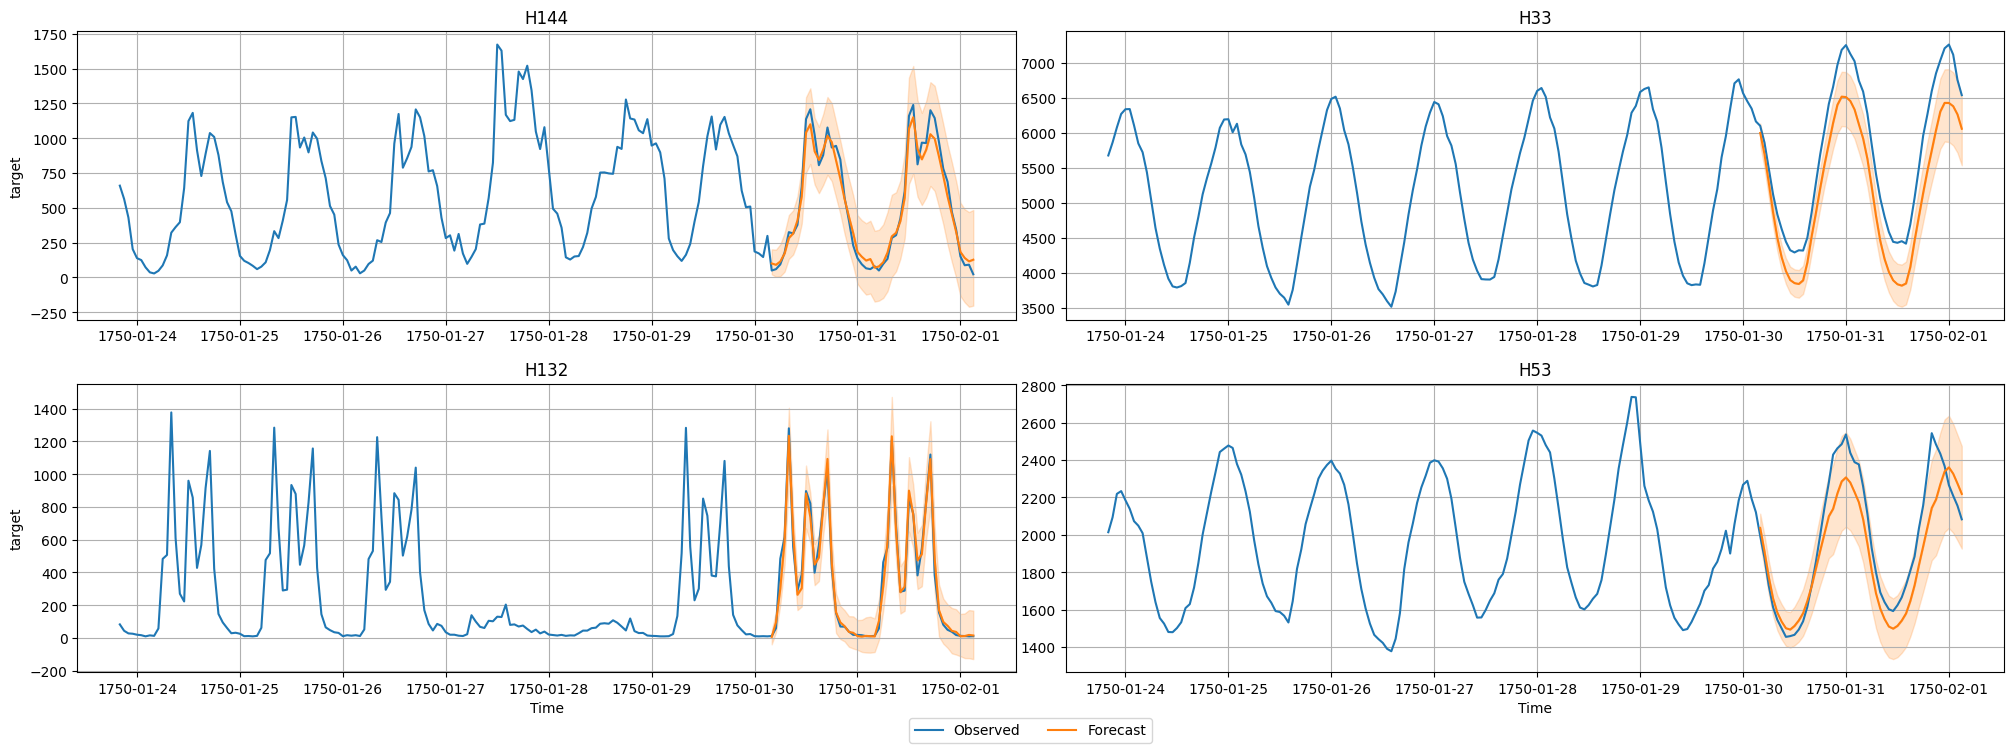

In [ ]:
# Plot 4 randomly chosen time series and the respective forecasts
predictor.plot(test_data, predictions, quantile_levels=[0.1, 0.9], max_history_length=200, max_num_item_ids=4);

In [ ]:
# The test score is computed using the last
# prediction_length=48 timesteps of each time series in test_data
predictor.leaderboard(test_data)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,WeightedEnsemble,-0.697903,-0.791454,18.627678,15.630883,0.586538,9
1,Chronos[bolt_small],-0.725739,-0.812070,1.239101,2.106887,2.022100,7
2,RecursiveTabular,-0.862797,-0.933874,0.868852,0.893383,6.469011,3
3,SeasonalNaive,-1.022854,-1.216909,0.106091,0.105900,0.078151,2
4,DirectTabular,-1.605700,-1.292127,0.279990,0.253547,4.936819,4
5,ETS,-1.806131,-1.966061,16.234149,12.377066,0.076084,5
6,Theta,-1.905365,-2.142531,30.758387,31.502539,0.075132,6
7,TemporalFusionTransformer,-1.923948,-2.202893,0.238327,0.155372,60.119202,8
8,Naive,-6.696079,-6.662942,0.108310,1.299663,0.096989,1
